In [2]:
#importing variables
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.model_selection import GridSearchCV
sns.set()

sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
table = data_table[0]
df = table[table["Symbol"].str.contains("BRK.B|BF.B") == False]
tickers = df['Symbol'].tolist()


all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []


In [3]:
for ticker in tickers:
    try:
        test_data = yf.download(ticker, start=dt.datetime(2005,1,1), end= dt.date.today())
        test_data['symbol'] = ticker
        all_data = pd.concat([all_data, test_data])
    except:
        no_data.append(ticker)

#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change()
all_data.dropna(subset=['return'], inplace=True)
all_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Open,High,Low,Close,Adj Close,Volume,symbol,return
Date,,,,,,,,
2005-01-04,82.400002,83.019997,81.669998,81.730003,49.030331,3644600.0,MMM,-0.008131
2005-01-05,81.699997,81.949997,80.730003,80.730003,48.430405,2895300.0,MMM,-0.012235
2005-01-06,80.879997,82.400002,80.820000,81.459999,48.868359,3014500.0,MMM,0.009042
2005-01-07,81.500000,82.800003,81.250000,82.300003,49.372269,3293000.0,MMM,0.010312
2005-01-10,82.300003,84.300003,82.300003,83.940002,50.356117,4343700.0,MMM,0.019927
...,...,...,...,...,...,...,...,...
2023-04-27,173.869995,174.130005,171.160004,173.949997,173.949997,1682900.0,ZTS,0.005840
2023-04-28,174.229996,177.039993,174.059998,175.779999,175.779999,1606700.0,ZTS,0.010520
2023-05-01,175.720001,179.940002,175.539993,179.559998,179.559998,1689900.0,ZTS,0.021504


Some Feature Engineering

## SMA

In [4]:
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']

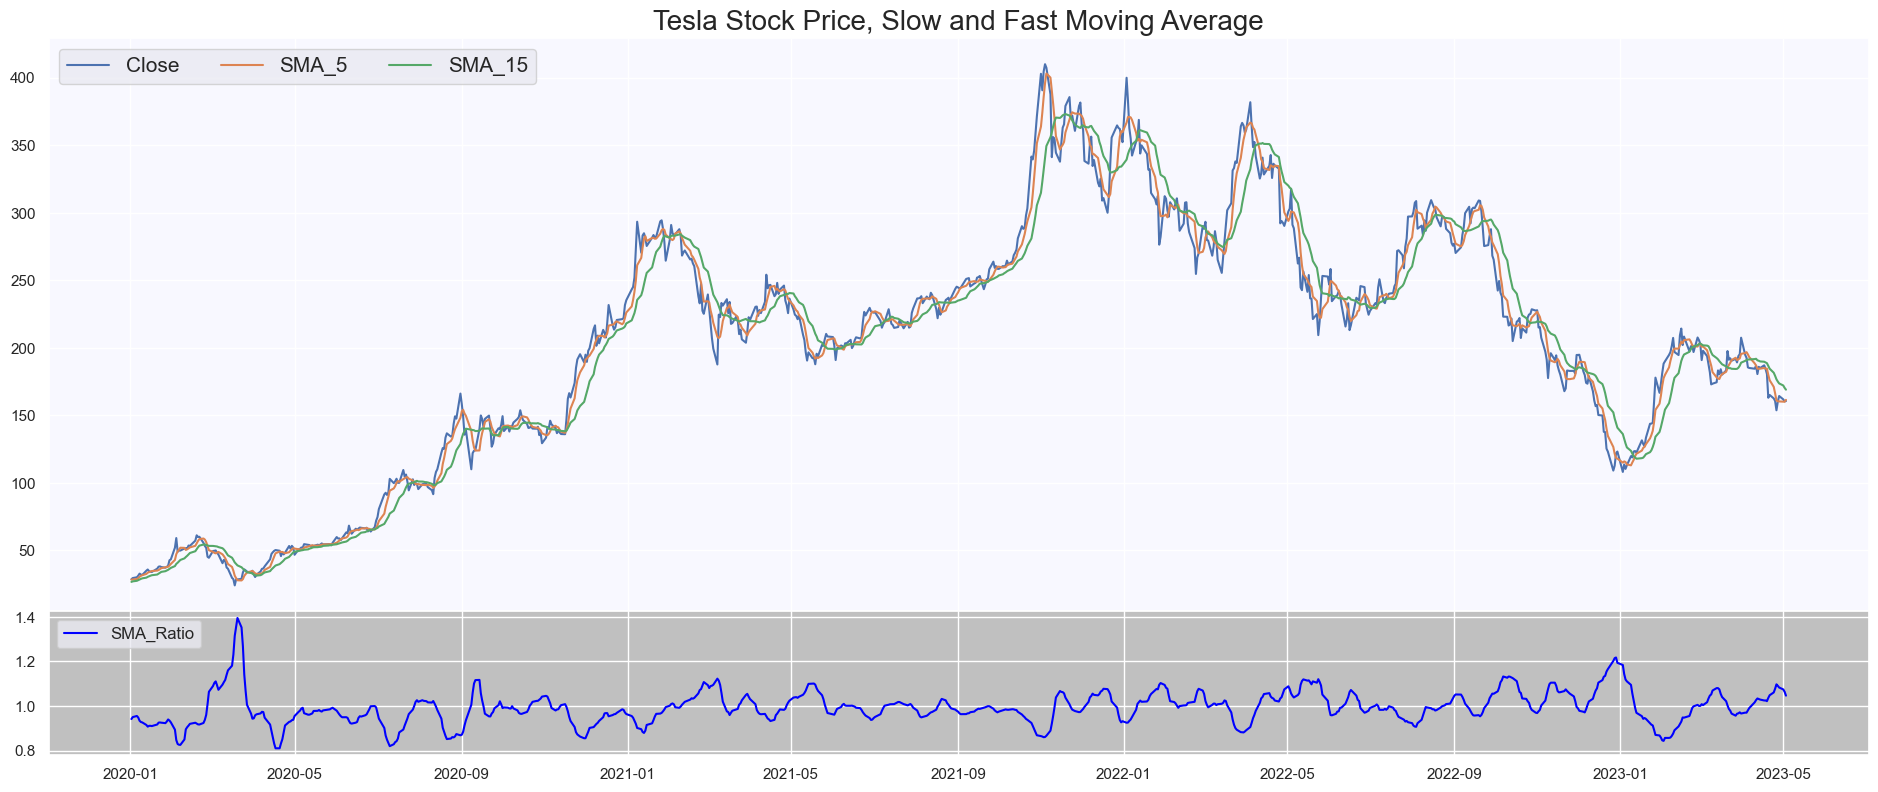

In [5]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Stock Price, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## SMA Volume

In [6]:
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_Volume_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']

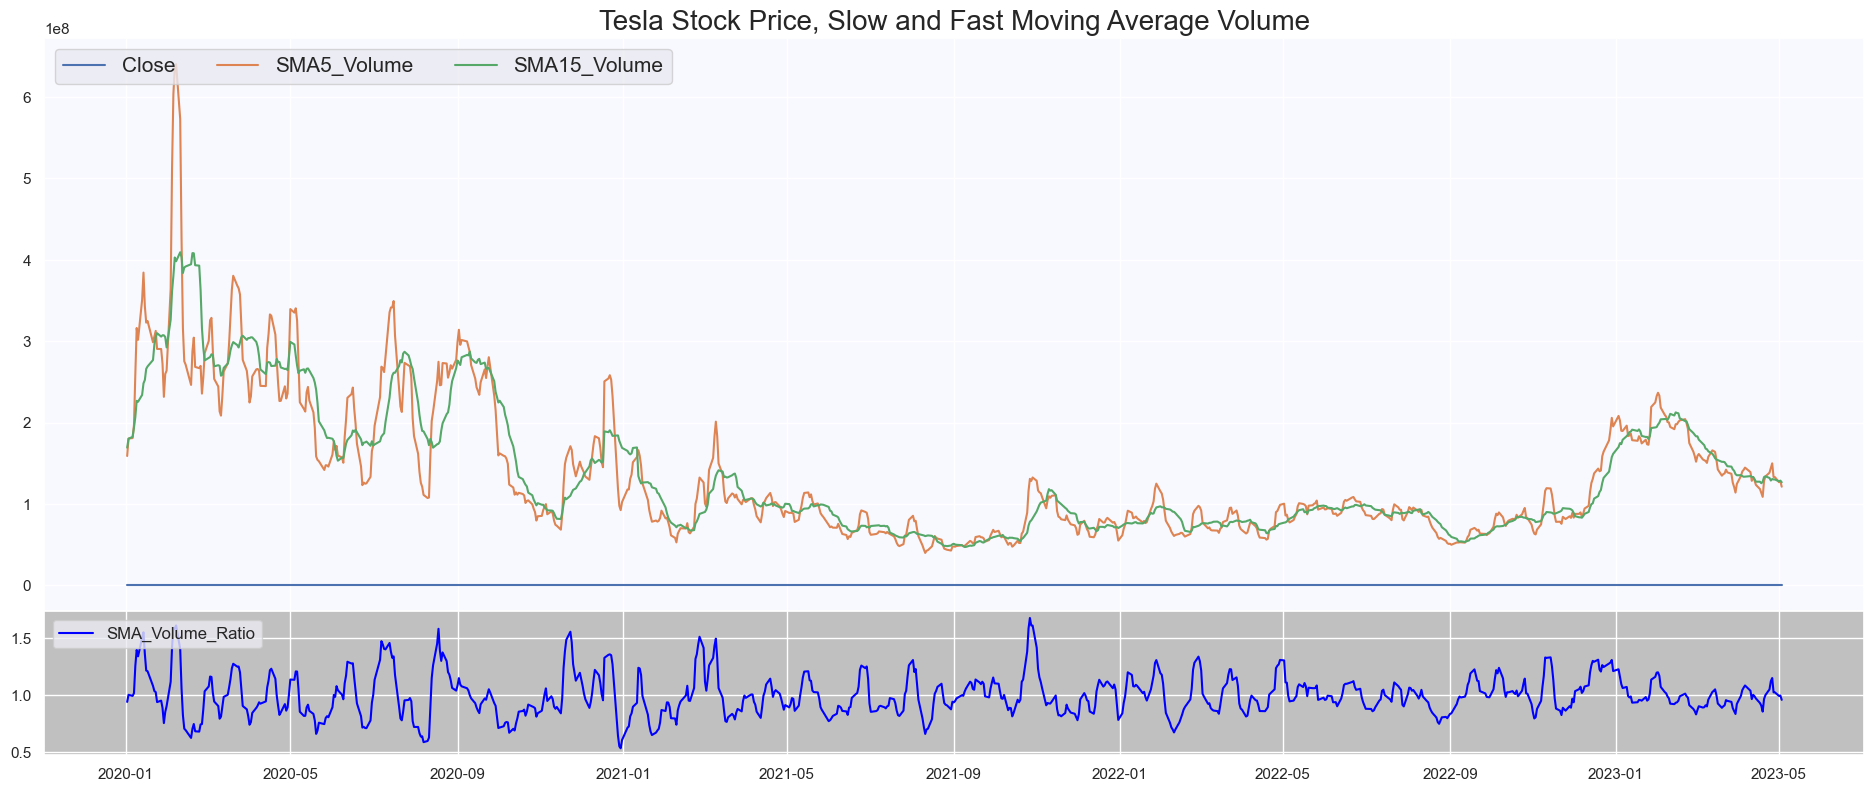

In [7]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close','SMA5_Volume','SMA15_Volume']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA5_Volume','SMA15_Volume'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Stock Price, Slow and Fast Moving Average Volume", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['SMA_Volume_Ratio']], color = 'blue')
ax1.legend(['SMA_Volume_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

Although SMA is quite common, it contains a bias of giving equal weight to each value in the past. To solve this, Wells Wilder introduced a new version of smoothening that places more weight on the recent events. We will use Wilder’s Smoothing for most of our following indicators.

In [8]:
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

## Average True Range

In [9]:
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']

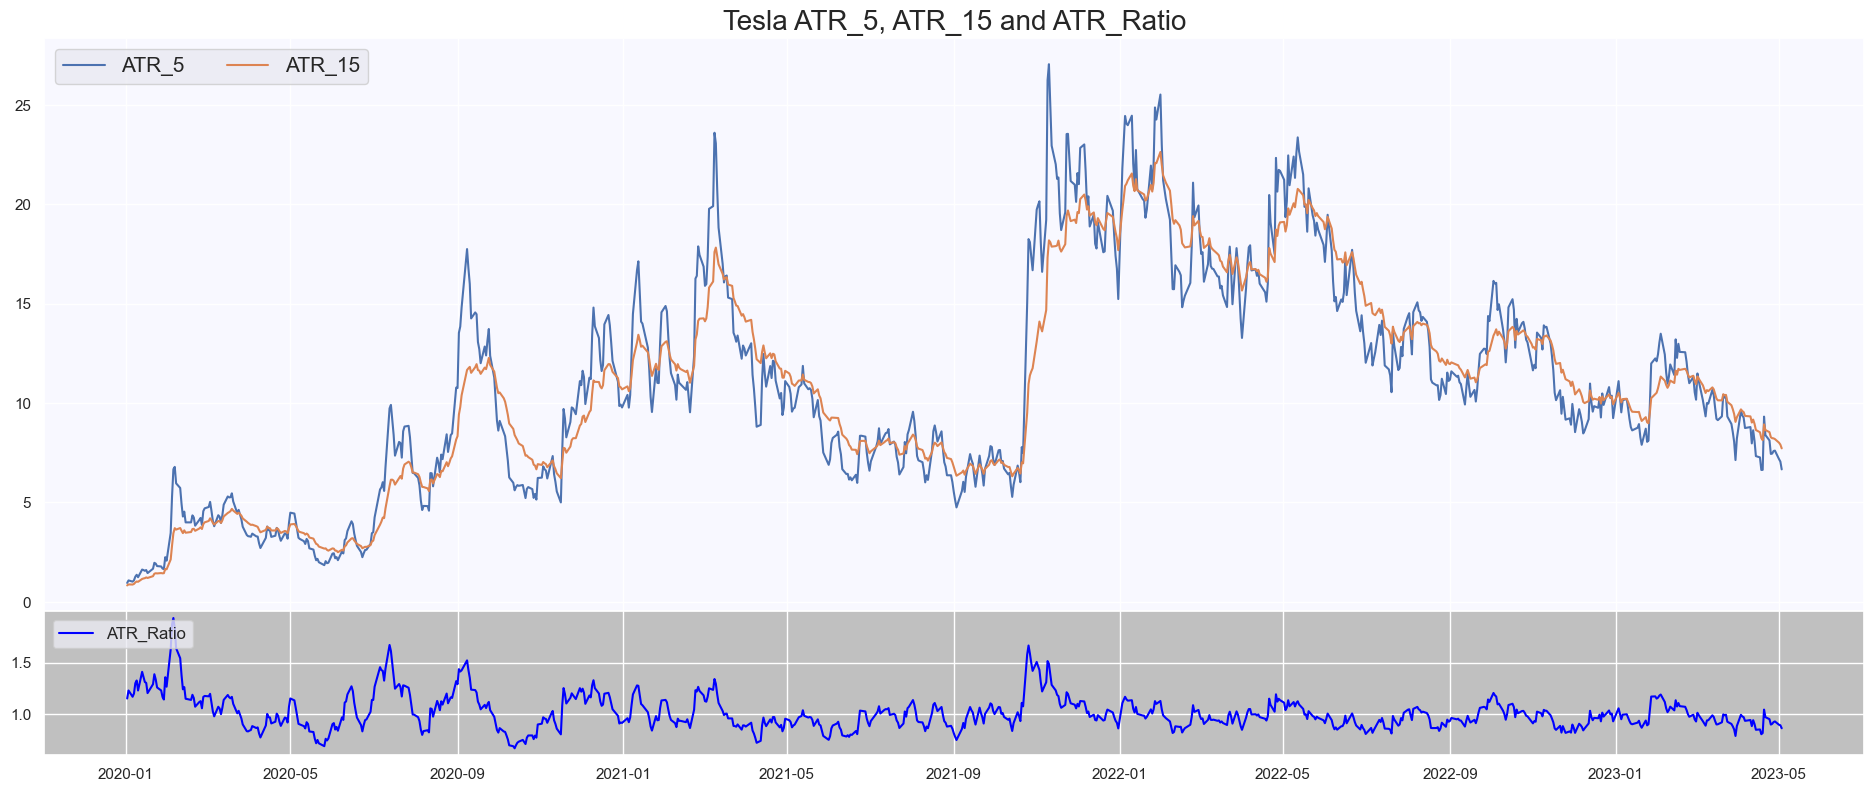

In [10]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['ATR_5','ATR_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['ATR_5','ATR_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla ATR_5, ATR_15 and ATR_Ratio", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['ATR_Ratio']], color = 'blue')
ax1.legend(['ATR_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Average Directional Index (ADX)

In [11]:
all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)

all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100

all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))

all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)

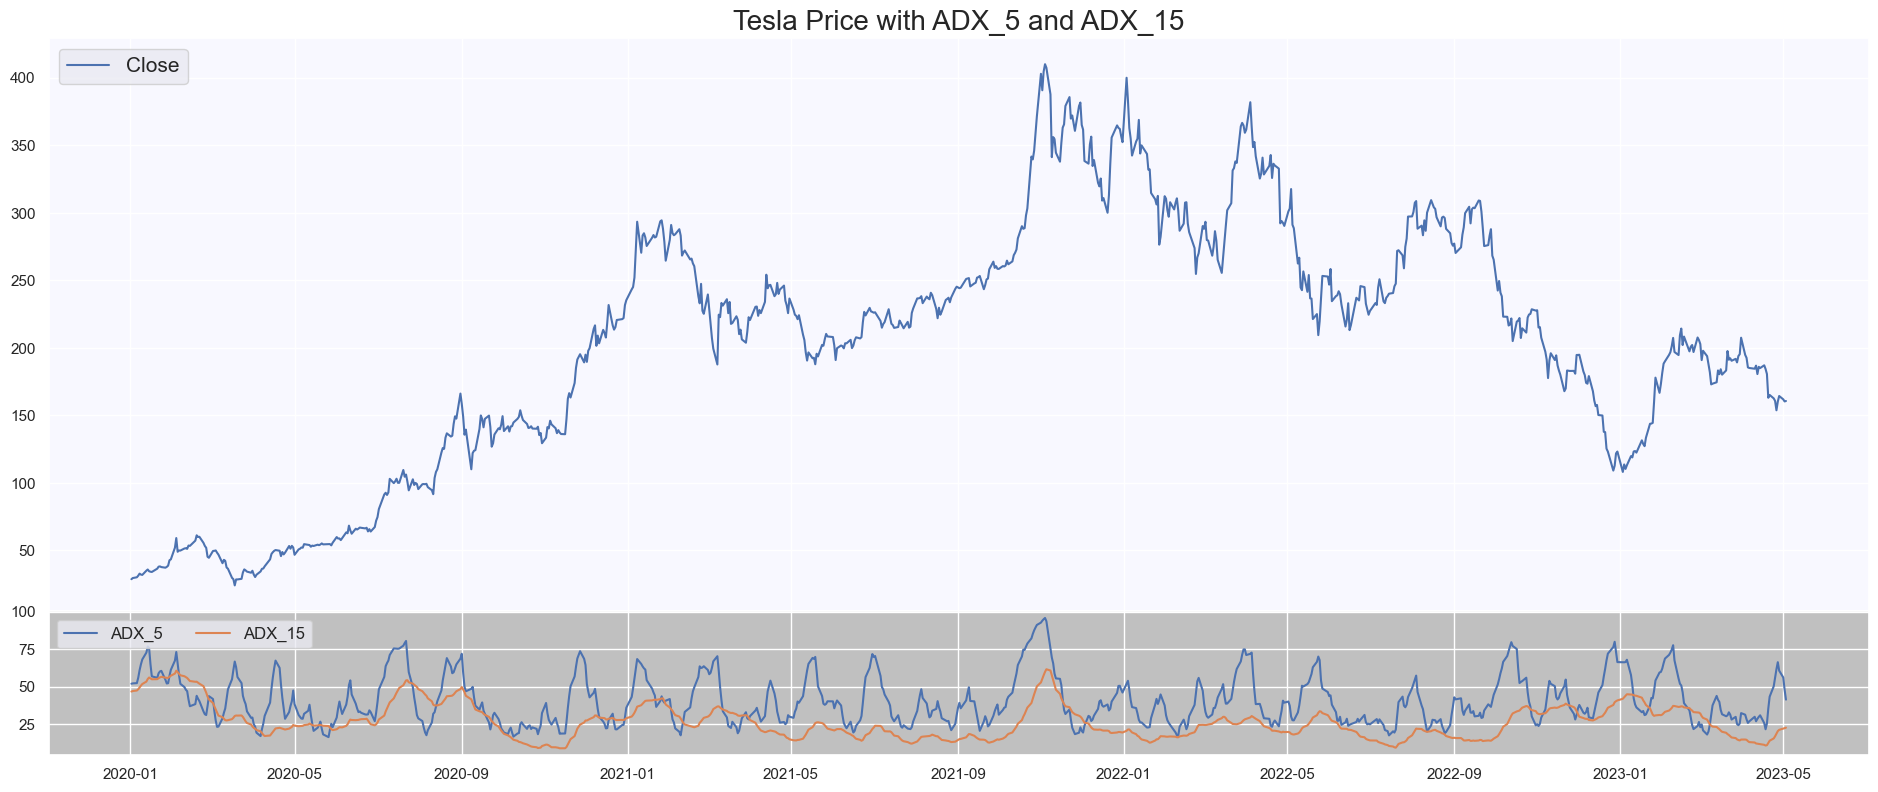

In [12]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['ADX_5','ADX_15']])
ax1.legend(['ADX_5','ADX_15'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Stochastic Oscillators

In [13]:
all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_5'].rolling(window = 15).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']

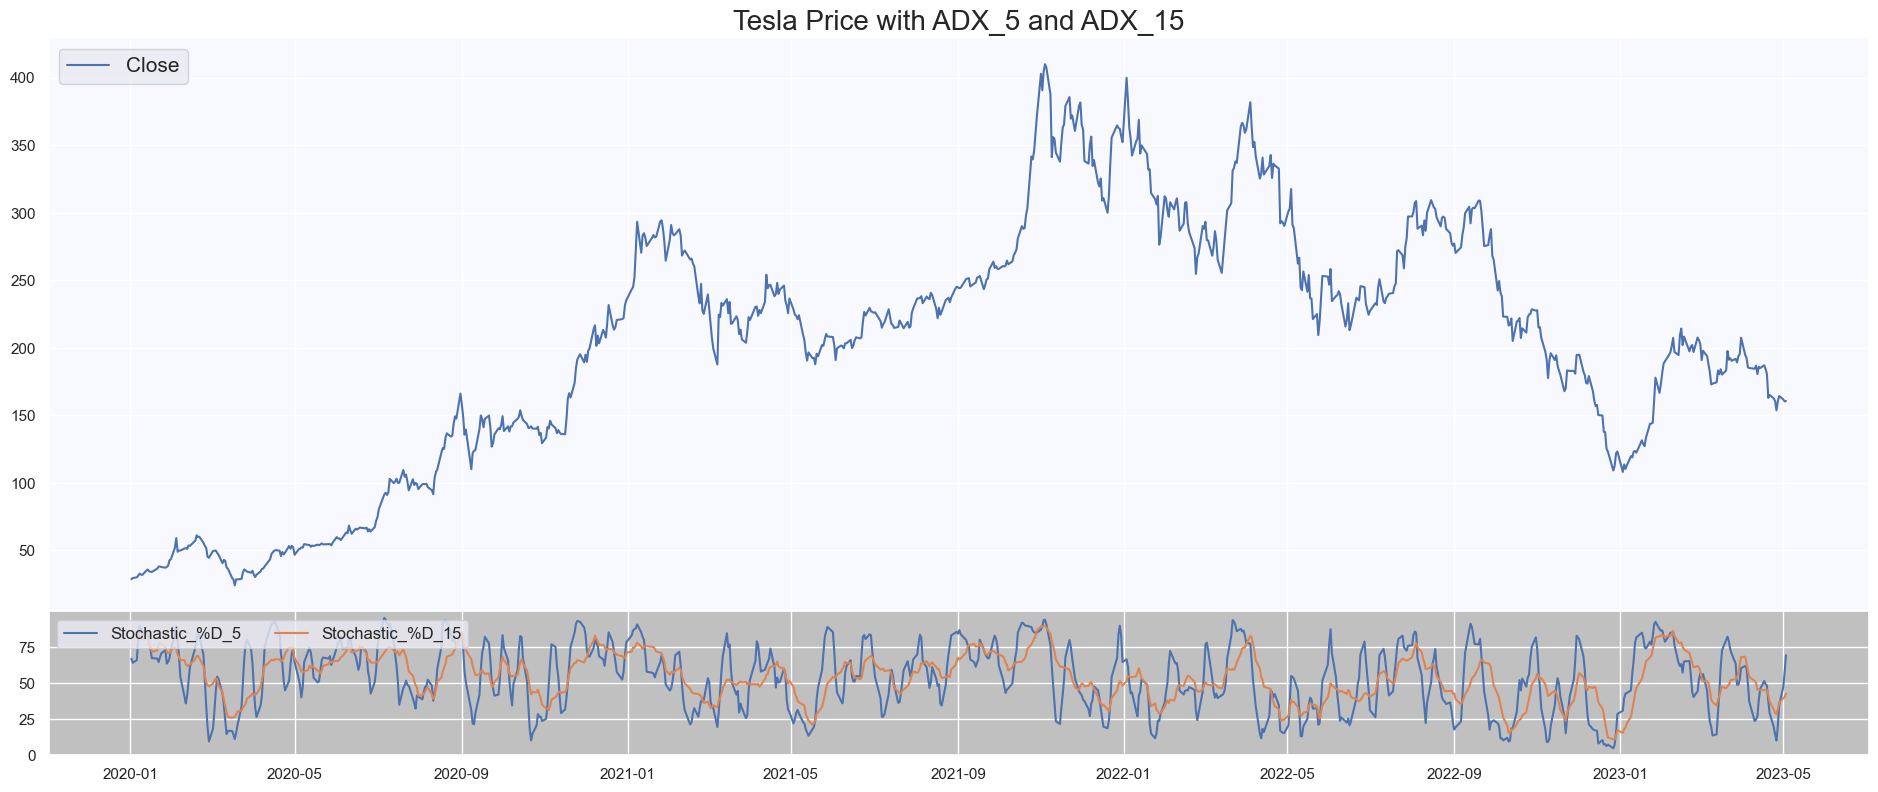

In [14]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Stochastic_%D_5','Stochastic_%D_15']])
ax1.legend(['Stochastic_%D_5','Stochastic_%D_15'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Relative Strength Index (RSI)

In [15]:
all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

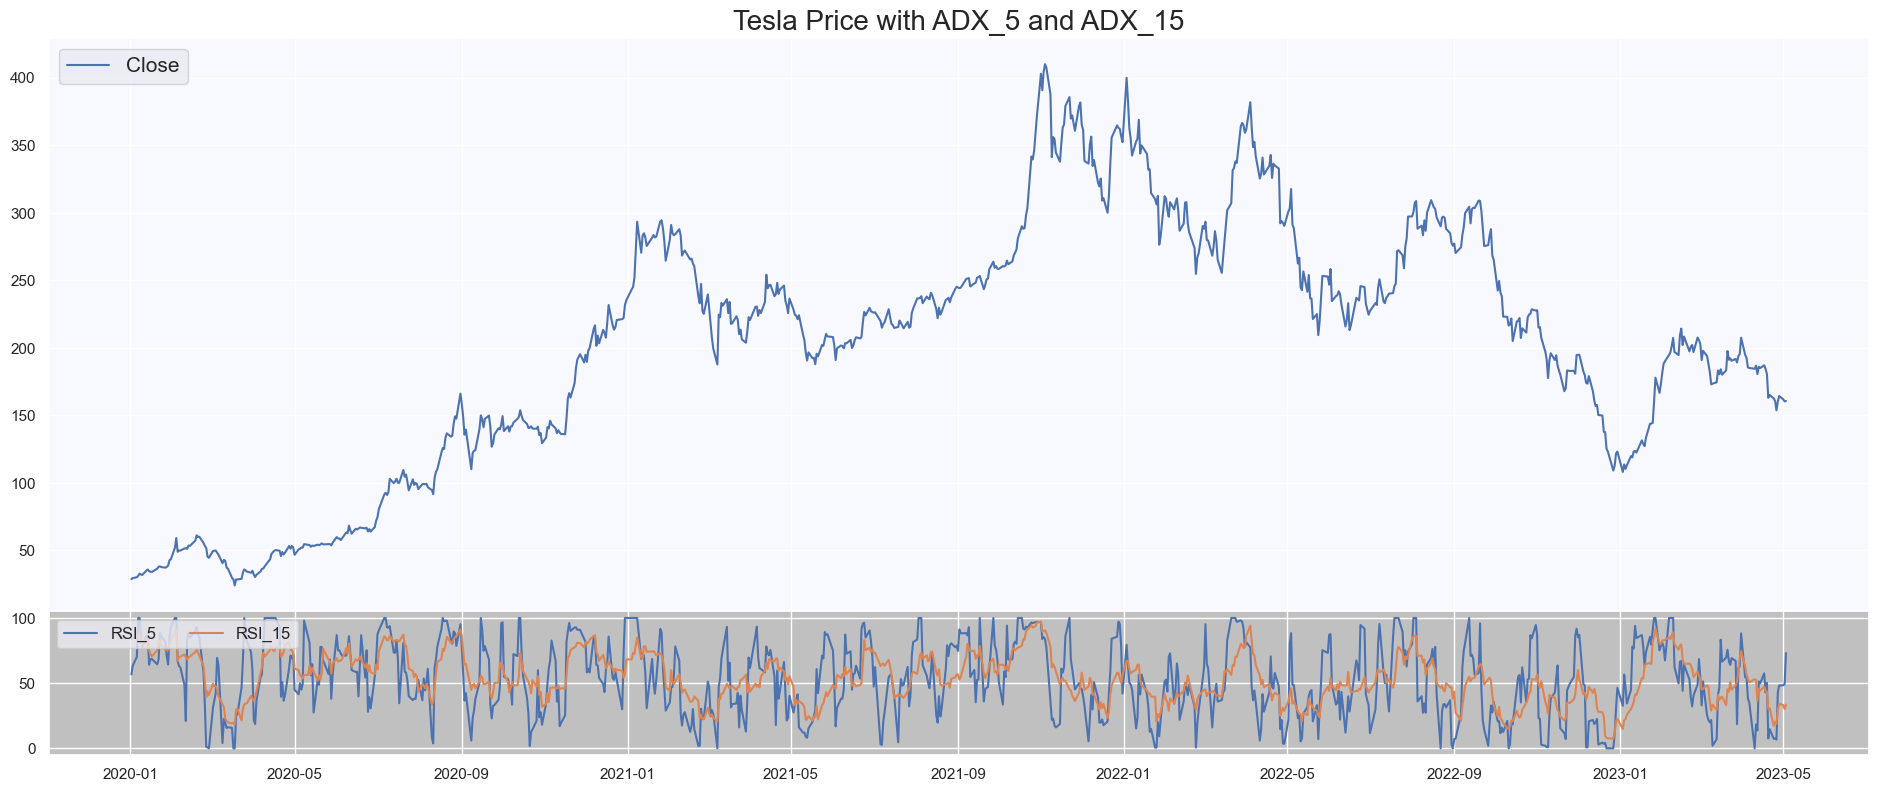

In [16]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['RSI_5','RSI_15']])
ax1.legend(['RSI_5','RSI_15'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Moving Average Convergence Divergence (MACD)

In [17]:
all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = all_data['15Ewm'] - all_data['5Ewm']

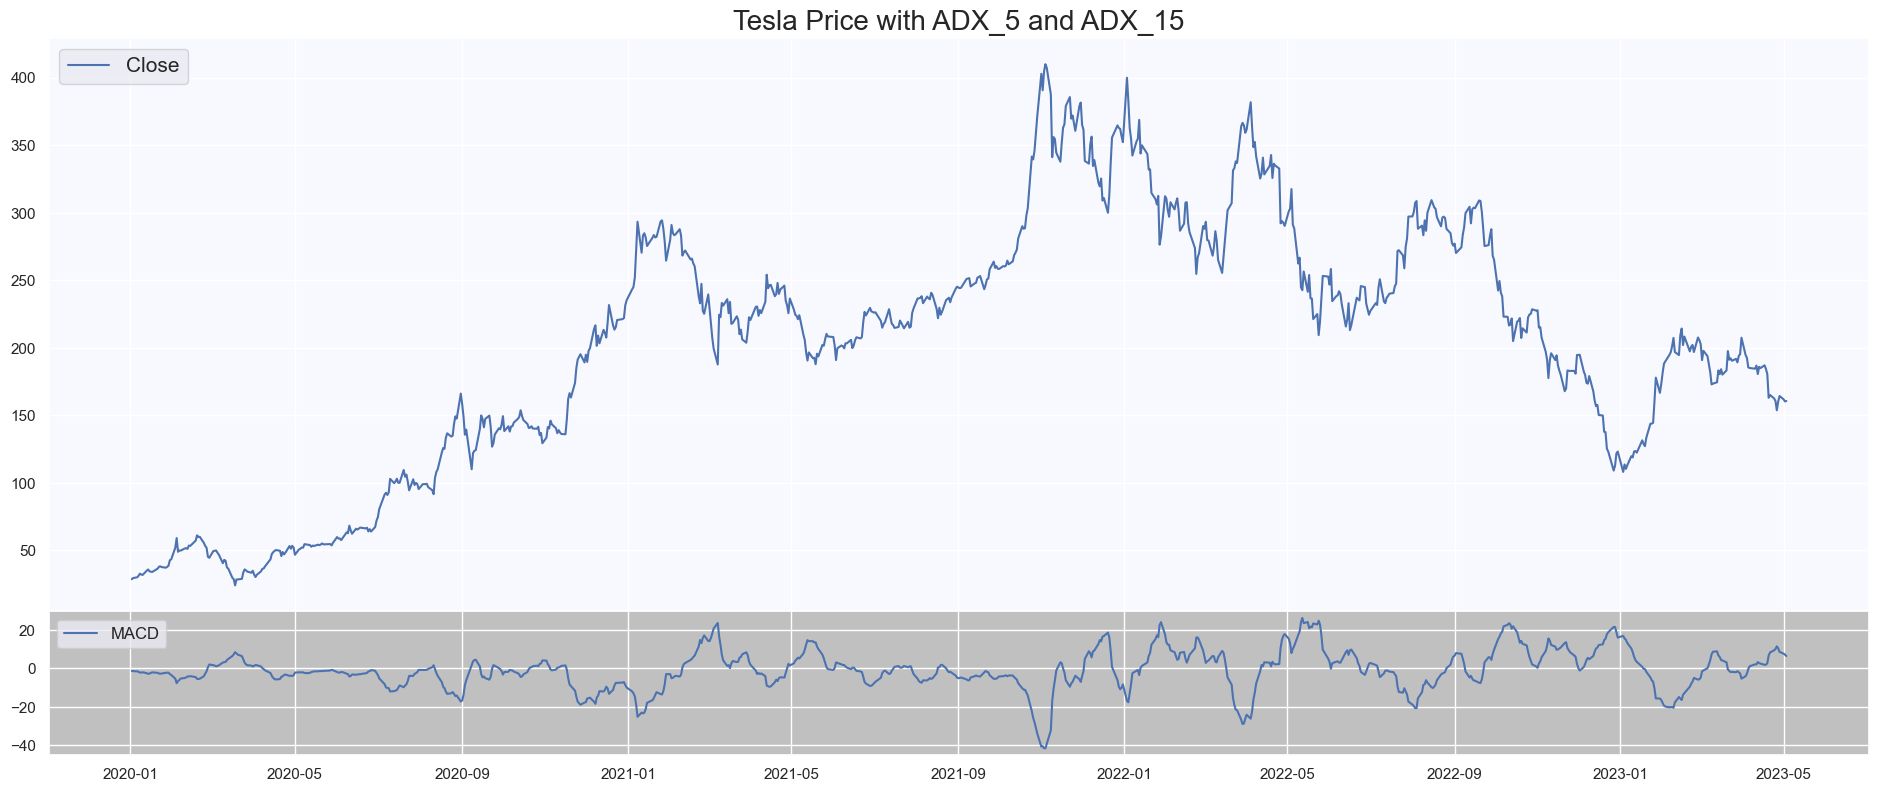

In [18]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['MACD']])
ax1.legend(['MACD'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Bollinger Bands

In [19]:
all_data['15MA'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).mean())
all_data['SD'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).std())
all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']

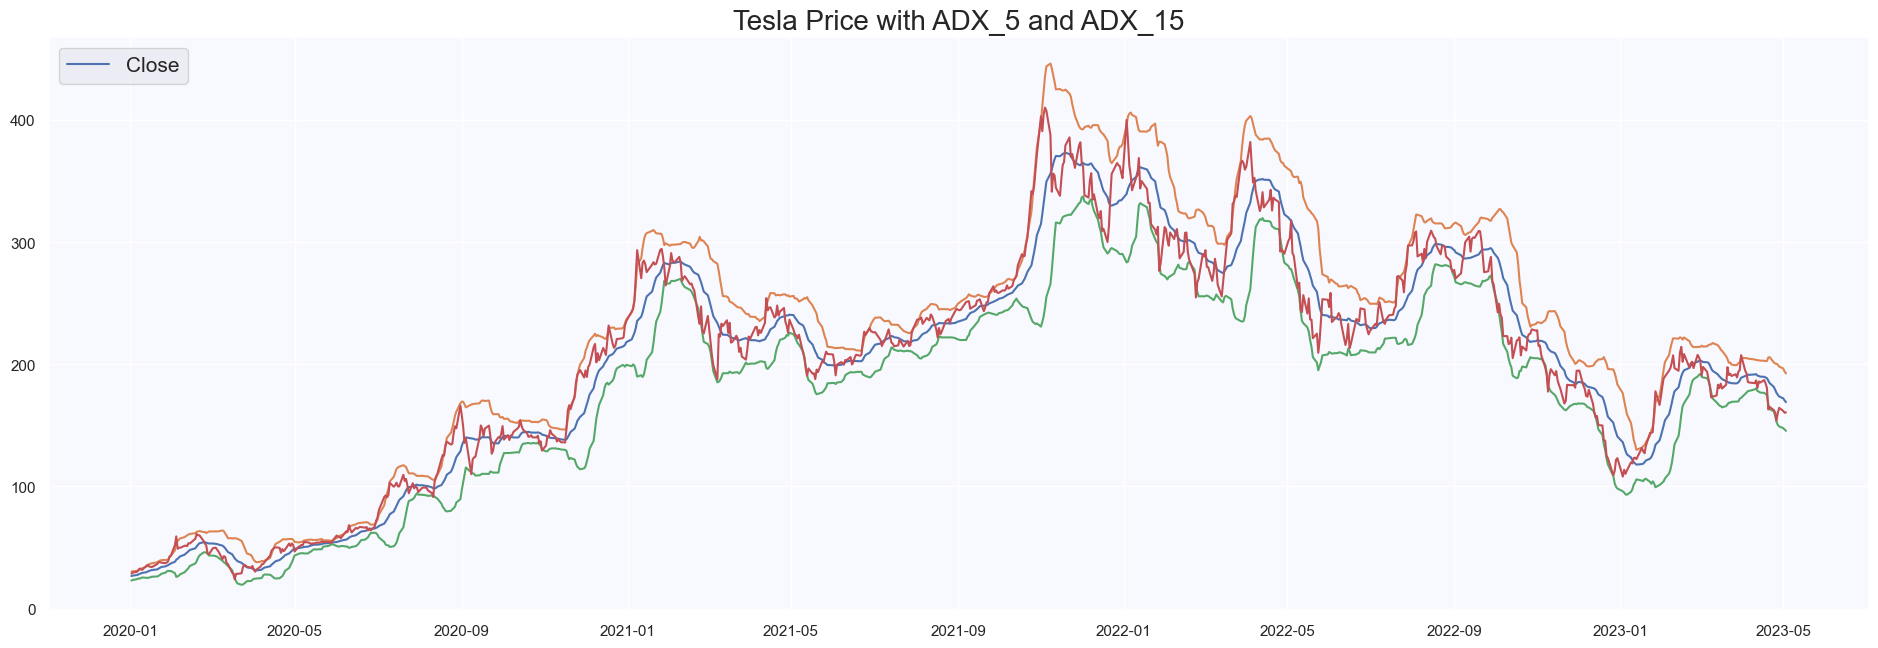

In [20]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['SMA_15','upperband','lowerband','Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)


plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Rate of Change

In [21]:
all_data['RC'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.pct_change(periods = 15)) 


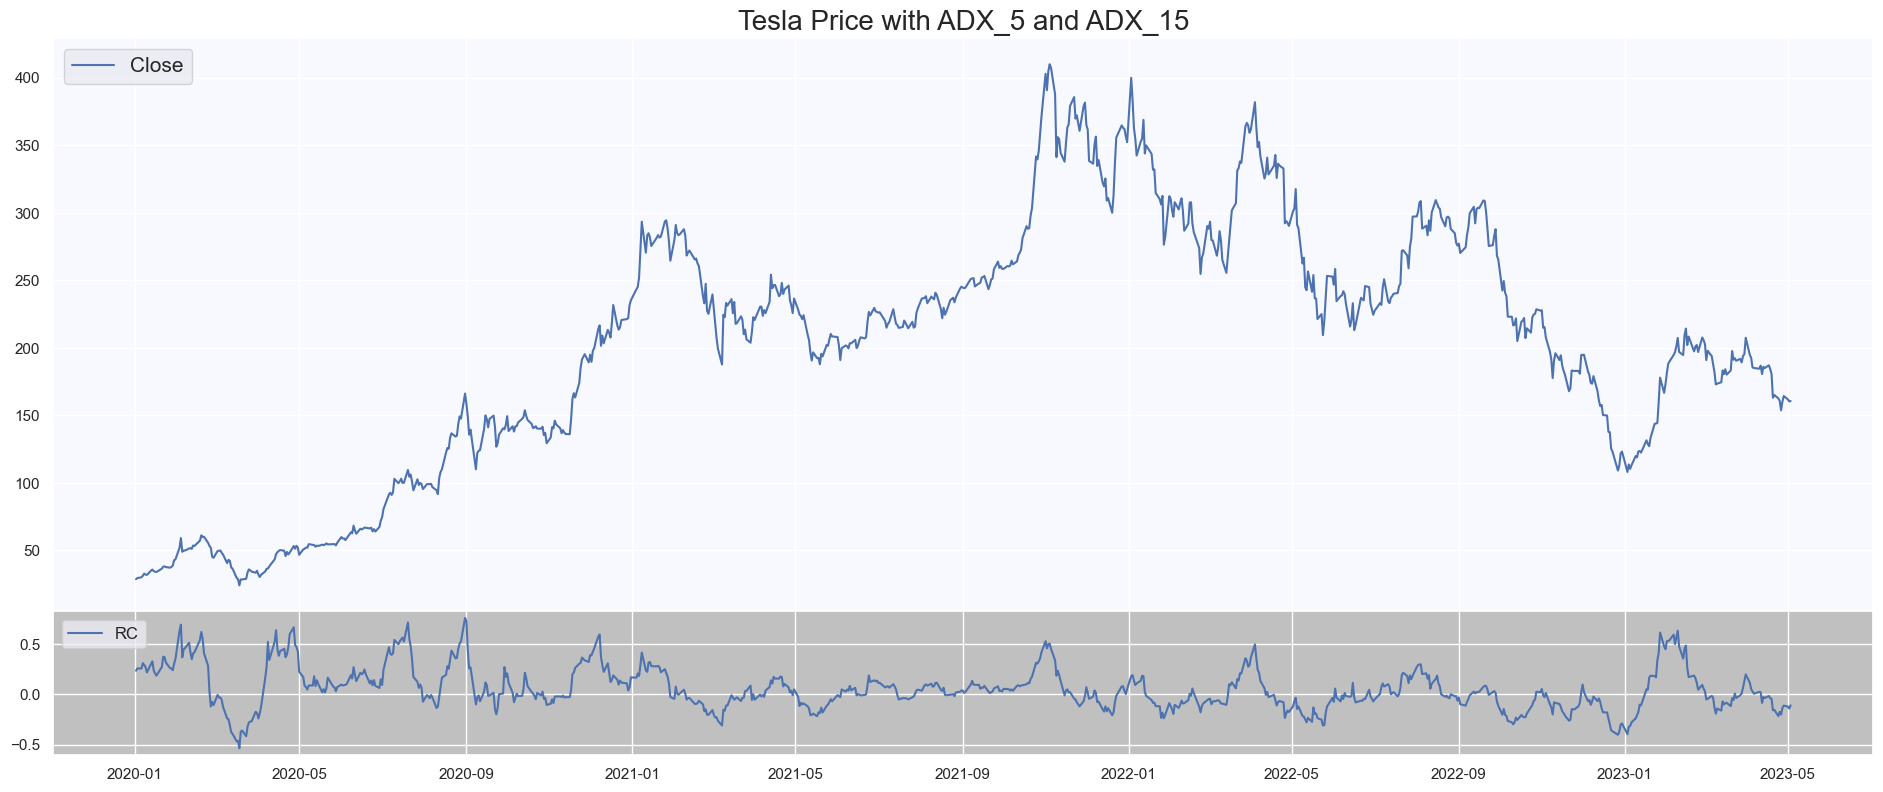

In [22]:
#Plotting
start = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2023-05-03', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Tesla Price with ADX_5 and ADX_15", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['RC']])
ax1.legend(['RC'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

# PREDICTION OF THESE INDICATORS

## Creating Prediction variable

In [23]:
all_data

,Open,High,Low,Close,Adj Close,Volume,symbol,return,SMA_5,SMA_15,...,RSI_15,RSI_ratio,5Ewm,15Ewm,MACD,15MA,SD,upperband,lowerband,RC
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,82.400002,83.019997,81.669998,81.730003,49.030331,3644600.0,MMM,-0.008131,NaN,NaN,...,NaN,NaN,81.730003,81.730003,0.000000,NaN,NaN,NaN,NaN,NaN
2005-01-05,81.699997,81.949997,80.730003,80.730003,48.430405,2895300.0,MMM,-0.012235,NaN,NaN,...,NaN,NaN,81.396670,81.605003,0.208333,NaN,NaN,NaN,NaN,NaN
2005-01-06,80.879997,82.400002,80.820000,81.459999,48.868359,3014500.0,MMM,0.009042,NaN,NaN,...,NaN,NaN,81.417780,81.586878,0.169098,NaN,NaN,NaN,NaN,NaN
2005-01-07,81.500000,82.800003,81.250000,82.300003,49.372269,3293000.0,MMM,0.010312,NaN,NaN,...,NaN,NaN,81.711854,81.676018,-0.035836,NaN,NaN,NaN,NaN,NaN
2005-01-10,82.300003,84.300003,82.300003,83.940002,50.356117,4343700.0,MMM,0.019927,82.032002,NaN,...,NaN,NaN,82.454570,81.959016,-0.495554,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27,173.869995,174.130005,171.160004,173.949997,173.949997,1682900.0,ZTS,0.005840,174.628003,173.480000,...,70.089285,0.670170,174.045091,172.895204,-1.149886,173.480000,2.134971,177.749942,169.210058,0.037578
2023-04-28,174.229996,177.039993,174.059998,175.779999,175.779999,1606700.0,ZTS,0.010520,174.408002,173.936000,...,71.085067,0.589264,174.623393,173.255804,-1.367590,173.936000,1.800254,177.536507,170.335492,0.040488
2023-05-01,175.720001,179.940002,175.539993,179.559998,179.559998,1689900.0,ZTS,0.021504,175.050000,174.515333,...,74.045376,0.891372,176.268928,174.043828,-2.225100,174.515333,2.114024,178.743381,170.287285,0.050857


In [25]:
all_data['Close_Shifted'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.shift(-6))
all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)
all_data['Target_Direction'] = np.where(all_data['Target']>0,1,0)
all_data = all_data.dropna().copy()

In [26]:
all_data

,Open,High,Low,Close,Adj Close,Volume,symbol,return,SMA_5,SMA_15,...,15Ewm,MACD,15MA,SD,upperband,lowerband,RC,Close_Shifted,Target,Target_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-15,85.000000,86.070000,84.720001,85.989998,51.585949,3753600.0,MMM,0.016310,84.378000,83.924666,...,83.985337,-0.759059,83.924666,0.753837,85.432339,82.416992,0.038276,84.269997,-1.052633,0
2005-02-16,85.500000,86.980003,85.370003,86.800003,52.071842,2962300.0,MMM,0.009420,85.068001,84.149999,...,84.337170,-1.092428,84.149999,1.042217,86.234433,82.065566,0.040518,84.599998,-2.937096,0
2005-02-17,86.480003,86.800003,85.709999,85.709999,51.417950,2913700.0,MMM,-0.012558,85.430000,84.337999,...,84.508774,-1.014291,84.337999,1.052984,86.443968,82.232031,0.034021,83.940002,-1.527160,0
2005-02-18,85.779999,86.500000,85.500000,85.550003,51.321960,2957100.0,MMM,-0.001867,85.732001,84.491333,...,84.638927,-0.893117,84.491333,1.050694,86.592721,82.389945,0.027628,84.470001,-0.983611,0
2005-02-22,85.400002,85.849998,83.849998,84.059998,50.428112,2989400.0,MMM,-0.017417,85.622000,84.471333,...,84.566561,-0.474801,84.471333,1.056213,86.583759,82.358907,-0.003556,84.559998,1.457936,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,175.940002,175.940002,172.850006,174.449997,174.076141,1396100.0,ZTS,-0.000974,173.731998,169.356666,...,170.492815,-3.072043,169.356666,3.955409,177.267485,161.445847,0.052743,172.940002,-0.045970,0
2023-04-19,174.029999,175.949997,173.929993,174.979996,174.604996,1241800.0,ZTS,0.003038,174.437997,170.019333,...,171.053712,-2.982858,170.019333,4.012792,178.044916,161.993750,0.060228,173.949997,1.017185,1
2023-04-20,174.009995,175.009995,172.389999,174.399994,174.399994,1297800.0,ZTS,-0.003315,174.609998,170.801999,...,171.471998,-2.685714,170.801999,3.598382,177.998763,163.605235,0.072175,175.779999,2.162041,1


Winsorizing the Indicators

In [27]:
Target_variables = ['SMA_ratio','ATR_5','ATR_15','ATR_Ratio',
                       'ADX_5','ADX_15','SMA_Volume_Ratio','Stochastic_5','Stochastic_15','Stochastic_Ratio',
                      'RSI_5','RSI_15','RSI_ratio','MACD']
for variable in Target_variables:
    all_data.loc[:,variable] = mstats.winsorize(all_data.loc[:,variable], limits = [0.1,0.1])

In [28]:
print(all_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-02-15   85.000000   86.070000   84.720001   85.989998   51.585949   
2005-02-16   85.500000   86.980003   85.370003   86.800003   52.071842   
2005-02-17   86.480003   86.800003   85.709999   85.709999   51.417950   
2005-02-18   85.779999   86.500000   85.500000   85.550003   51.321960   
2005-02-22   85.400002   85.849998   83.849998   84.059998   50.428112   
...                ...         ...         ...         ...         ...   
2023-04-18  175.940002  175.940002  172.850006  174.449997  174.076141   
2023-04-19  174.029999  175.949997  173.929993  174.979996  174.604996   
2023-04-20  174.009995  175.009995  172.389999  174.399994  174.399994   
2023-04-21  175.759995  177.259995  174.919998  176.880005  176.880005   
2023-04-24  176.990005  177.440002  175.720001  176.350006  176.350006   

               Volume symbol    retur

Clustering companies & Identifying the number of clusters

    Difference in SS
1                NaN
2          -0.698643
3          -0.548211
4          -0.327381
5          -0.211892
6          -0.194788
7          -0.153608
8          -0.108897
9          -0.113316
10         -0.157125
11         -0.022391
12         -0.078814
13         -0.078703
14         -0.146887
15         -0.064125
16         -0.017332
17         -0.075313
18         -0.005841
19         -0.061256
20         -0.072435
21         -0.038836
22         -0.023765
23         -0.065885
24         -0.028532
25         -0.078212
26         -0.047193
27         -0.022799
28         -0.023110
29         -0.086976
30          0.019776
31         -0.064574
32         -0.022938
33         -0.008217
34         -0.028514
35         -0.073426
36         -0.050933
37          0.007796
38         -0.078510
39         -0.014634
40         -0.047600
41          0.018809
42         -0.086128
43          0.025935
44         -0.047026
45         -0.031368
46          0.002895
47         -0

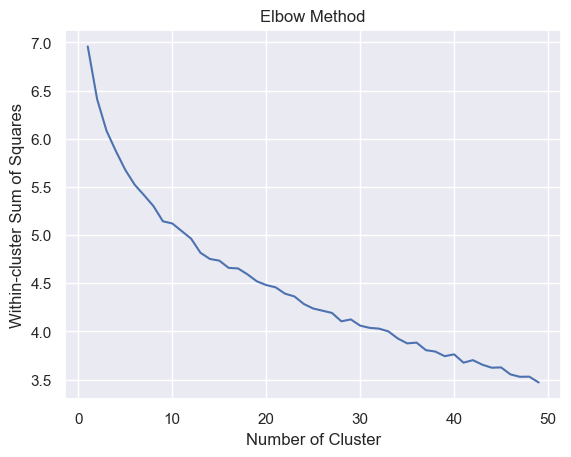

In [29]:
#Extract the returns
returns = all_data[['symbol','return']].copy()
returns['Date'] = returns.index.copy()

#Pivot the returns to create series of returns for each stock 
transposed = returns.pivot(index = 'Date', columns = 'symbol', values = 'return')

#Transpose the data to get companies on the index level and dates on the column level since clusters takes place on index level
X = transposed.dropna().transpose()

#Extract sum of squares for K-means clusters from 1 to 50 clusters
sum_of_sq = np.zeros([50, 1])
for k in range(1, 51):
    sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_
    
plt.plot(range(1, 50), sum_of_sq[1:50])
plt.title("Elbow Method") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Within-cluster Sum of Squares")

print(pd.DataFrame(sum_of_sq, columns = ['Difference in SS'], index = range(1,51)).diff())

plt.show()

Silhouette Analysis

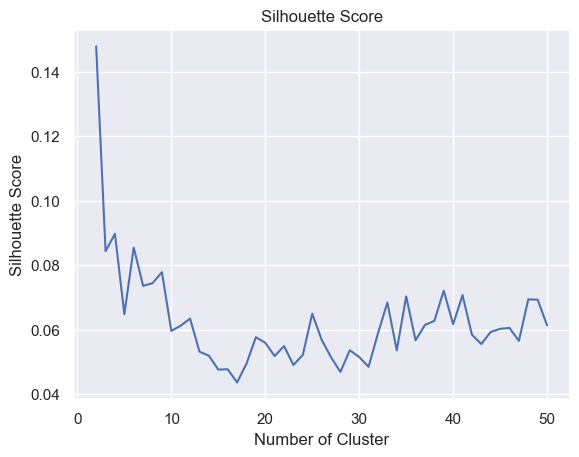

In [30]:
from sklearn.metrics import silhouette_score

# calculate silhouette score for K-means clusters from 2 to 50 clusters
silhouette_scores = []
for k in range(2, 51):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
plt.plot(range(2, 51), silhouette_scores)
plt.title("Silhouette Score") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Silhouette Score")

plt.show()

Lets take optimal number of clusters as 8

In [31]:
#Get 8 clusters
gmm = GaussianMixture(n_components = 8)
gmm.fit(transposed.dropna().transpose())

#Predict for each company
clusters = gmm.predict(transposed.dropna().transpose())
clusters_df = pd.DataFrame({'Cluster':clusters,
                           'Companies':transposed.columns})

#Sort by Clusters
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)

#Save as csv
clusters_df.to_csv("clusters.csv")
clusters_df = pd.read_csv("clusters.csv", index_col = 0)

Training Period

In [32]:
all_data.index = pd.to_datetime(all_data.index)
print(all_data)

train_data = all_data.loc[:'2018-12-31',]
test_data = all_data.loc['2019-01-01':] 

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-02-15   85.000000   86.070000   84.720001   85.989998   51.585949   
2005-02-16   85.500000   86.980003   85.370003   86.800003   52.071842   
2005-02-17   86.480003   86.800003   85.709999   85.709999   51.417950   
2005-02-18   85.779999   86.500000   85.500000   85.550003   51.321960   
2005-02-22   85.400002   85.849998   83.849998   84.059998   50.428112   
...                ...         ...         ...         ...         ...   
2023-04-18  175.940002  175.940002  172.850006  174.449997  174.076141   
2023-04-19  174.029999  175.949997  173.929993  174.979996  174.604996   
2023-04-20  174.009995  175.009995  172.389999  174.399994  174.399994   
2023-04-21  175.759995  177.259995  174.919998  176.880005  176.880005   
2023-04-24  176.990005  177.440002  175.720001  176.350006  176.350006   

               Volume symbol    retur

C:\Users\anura\AppData\Local\Temp\ipykernel_31064\259041477.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test_data = all_data.loc['2019-01-01':]


C:\Users\anura\AppData\Local\Temp\ipykernel_31064\4109535166.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'],


Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

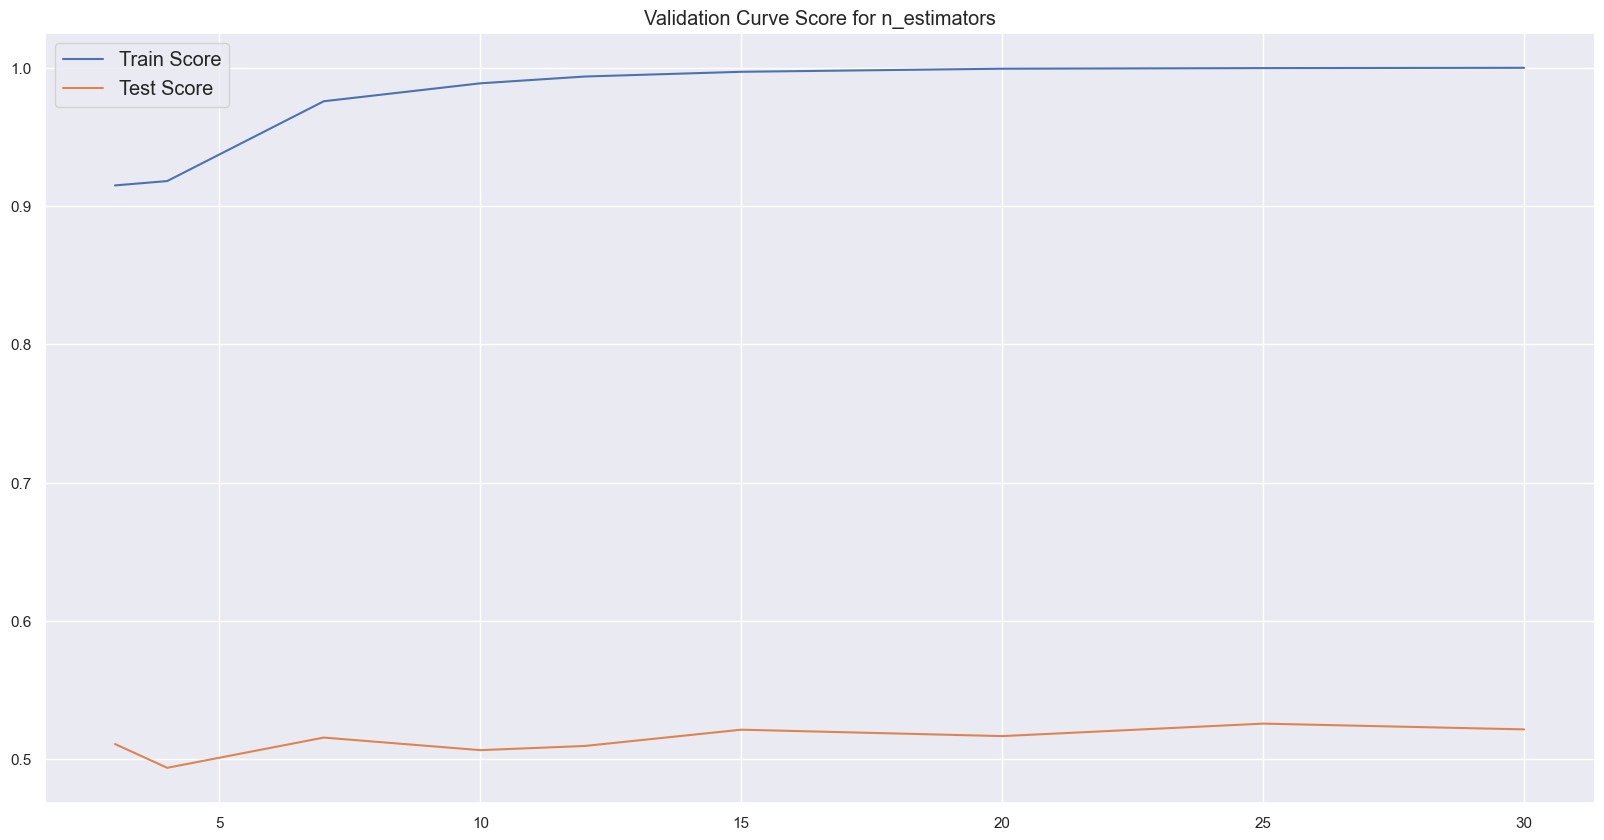

In [33]:
#Separate between X and Y
X_train = train_data.loc[:,Target_variables]

Y_train = train_data.loc[:,['Target_Direction']]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,4,7,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

In [34]:
#Run the loop for every unique cluster - 8 loops
for cluster_selected in clusters_df.Cluster.unique():
    
    print(f'The current cluster running is : {cluster_selected}')
    
    #Get data for that cluster
    co_data = all_data[all_data.symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    co_train = co_data[:'2018-12-31']
    co_train = co_train.dropna().copy()
    
    X_train = co_train.loc[:,Target_variables]

    Y_train = co_train.loc[:,['Target_Direction']]

    #Define paramters from Validation Curve
    params = {'max_depth': [5, 7],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10, 15, 20],
          'n_estimators': [5, 7, 9],
         'min_samples_split':[20, 25, 30]} #Using Validation Curves

    rf = RandomForestClassifier()

    #Perform a TimeSeriesSplit on the dataset
    time_series_split = TimeSeriesSplit(n_splits = 3)

    
    rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)

    #Fit the random forest with our X_train and Y_train
    rf_cv.fit(X_train, Y_train)
          
    #Save the fited variable into a Pickle file
    file_loc = f'{os.getcwd()}/Pickle_Files/Cluster_{cluster_selected}'    
    pickle.dump(rf_cv, open(file_loc,'wb'))

The current cluster running is : 0
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 1
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 2
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 3
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 4
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 5
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 6
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The current cluster running is : 7
Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


TESTING

In [35]:
print(test_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  187.820007  190.990005  186.699997  190.949997  163.430115   
2019-01-03  188.279999  188.279999  182.889999  183.759995  157.276352   
2019-01-04  186.750000  191.979996  186.029999  191.320007  163.746811   
2019-01-07  191.360001  192.300003  188.660004  190.880005  163.370224   
2019-01-08  193.000000  194.110001  189.580002  191.679993  164.054932   
...                ...         ...         ...         ...         ...   
2023-04-18  175.940002  175.940002  172.850006  174.449997  174.076141   
2023-04-19  174.029999  175.949997  173.929993  174.979996  174.604996   
2023-04-20  174.009995  175.009995  172.389999  174.399994  174.399994   
2023-04-21  175.759995  177.259995  174.919998  176.880005  176.880005   
2023-04-24  176.990005  177.440002  175.720001  176.350006  176.350006   

               Volume symbol    retur

In [44]:
#Use 2nd January Data
day_data = test_data.loc['2019-01-02']

pred_for_tomorrow = pd.DataFrame({'Date':[],
                                  'company':[],
                                  'prediction':[]})

#Predict each stock using the 2nd January Data
for cluster_selected in clusters_df.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'/Pickle_Files/Cluster_{cluster_selected}', 'rb'))
    best_rf = rf_cv.best_estimator_
    cluster_data = day_data.loc[day_data.symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Target_variables]

        pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                   'company':cluster_data['symbol'],
                                                                   'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)


C:\Users\anura\AppData\Local\Temp\ipykernel_31064\3917376260.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
C:\Users\anura\AppData\Local\Temp\ipykernel_31064\3917376260.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
C:\Users\anura\AppData\Local\Temp\ipykernel_31064\3917376260.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
C:\Users\anura\AppData\Local\Temp\ipykernel_31064\3917376260.py:17: FutureWarning: The frame.append method is deprecated and will be 

In [45]:
pred_for_tomorrow

,Date,company,prediction
0,2019-01-02,ATVI,0.453149
1,2019-01-02,EA,0.410061
2,2019-01-02,JNPR,0.435746
3,2019-01-02,MTCH,0.534832
4,2019-01-02,TTWO,0.429463
...,...,...,...
483,2019-01-02,WEC,0.570961
484,2019-01-02,XEL,0.576518
485,2019-01-02,YUM,0.520913
486,2019-01-02,ZBH,0.536242


In [46]:
pred_for_tomorrow.to_csv('pred_for_tomorrow.csv', index=False)

We now have a dataframe with the probability of up move for each stock. This can be used for trading on 3rd January.

In order to find the stocks with highest probability of up move, we sort the prediction column in a descending order and pick and top 10 stocks.

Hence, once we have the 10 stocks, we will wait for 3rd January 2019 and buy at the Open price, hold for 7 days, and sell on the 7th trading day end Closing price. The main assumption here is that we can trade at the Open price and sell at the Close price. This is not too unrealistic given we know the timings of the market and can code to execute 1 minute after Opening and 1 minute before Closing of the day.

In [47]:
top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

for selected_company in top_10_pred['company']:
    actual = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target_Direction']
    pct_change = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target']
    top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
    top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change

In [48]:
top_10_pred

,Date,company,prediction,actual,pct_change
142,2019-01-02,BXP,0.598745,1.0,9.321960
161,2019-01-02,FRT,0.598745,1.0,6.562478
59,2019-01-02,TXN,0.593756,1.0,7.361423
12,2019-01-02,ADI,0.593756,1.0,8.519099
487,2019-01-02,CTLT,0.590801,1.0,10.078278
138,2019-01-02,AVB,0.584584,1.0,5.580847
42,2019-01-02,MPWR,0.583687,1.0,9.218045
30,2019-01-02,ILMN,0.581152,1.0,2.805586
62,2019-01-02,ZBRA,0.581152,1.0,6.077342
43,2019-01-02,MSCI,0.581152,1.0,6.084279


In [ ]:
top_10_pred.to_csv('top_10_pred.csv', index=False)

We can see that for 9 out of top 10 firms, the prediction was actually an up move in the next 7 trading days thus one could potentially trade on the prediction information on beginning of 3rd January 2019 and if all 10 stocks were bought, there would be a profit realized on 9 of these stocks assuming a holding period of 7 days.

In [ ]:
import yfinance as yf

# Get data for ticker SEDG for the year 2019
ticker = 'SEDG'
start_date = '2019-01-01'
end_date = '2019-01-14'
data = yf.download(ticker, start=start_date, end=end_date)

# Print the data
data


At 02 Jan, 2019, we know SEDG has the highest probability of up movement. We wait until 3rd January 2019 and buy SEDG at the Open price.

We hold the stock for 7 trading days (until 11th January 2019) and sell it at the Close price on 11th January.

So, we'd have bought the stock at $35.68 and sold it at $36.40. Therefore 2.02% profit.